In [1]:
from datetime import datetime
from elasticsearch import Elasticsearch
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time

In [2]:
es_ip = "http://127.0.0.1:9200/"

In [3]:
es = Elasticsearch(es_ip)

In [ ]:
# test to search data from winlogbeat

In [5]:
res = es.get(index="winlogbeat", id="K83l130BMs_nTerjfMVt")
print(res['_source'])

{'@timestamp': '2021-12-20T12:51:18.229Z', 'ecs': {'version': '1.9.0'}, 'agent': {'type': 'winlogbeat', 'version': '7.13.2', 'hostname': 'DESKTOP-T3V8EOP', 'ephemeral_id': '41f4d791-f3b8-47ed-b193-c7151f023406', 'id': '621af60c-6ab1-4b77-803e-d523c7d8ec04', 'name': 'DESKTOP-T3V8EOP'}, 'event': {'created': '2021-12-20T12:51:20.151Z', 'code': '1', 'kind': 'event', 'provider': 'Microsoft-Windows-Sysmon', 'timezone': '+08:00'}, 'log': {'level': 'information'}, 'host': {'architecture': 'x86_64', 'os': {'name': 'Windows 10 Pro', 'kernel': '10.0.22000.318 (WinBuild.160101.0800)', 'build': '22000.318', 'type': 'windows', 'platform': 'windows', 'version': '10.0', 'family': 'windows'}, 'id': '1f725ed7-b14c-494d-9fc1-4bc3eeb0b29b', 'ip': ['fe80::1911:e65c:d649:9768', '192.168.56.1', 'fe80::24c3:baf3:3d58:f2af', '169.254.242.175', 'fe80::a832:f35:3de:862c', '169.254.134.44', 'fe80::d4a8:14f8:2744:a74a', '192.168.0.83', 'fe80::4d6b:1d3e:cee1:343d', '169.254.52.61'], 'name': 'DESKTOP-T3V8EOP', 'mac'

In [ ]:
# Show Event Count by computer_name

In [10]:
query_str = {"size": 0,"aggregations": {"result": {"terms": {"field": "winlog.computer_name.keyword","order": [{"_count": "desc"}]}}}}
res = es.search(index="winlogbeat", body=query_str)
result = res["aggregations"]["result"]["buckets"]

C:\Users\s2569\AppData\Local\Temp/ipykernel_5348/292756096.py:2: DeprecationWarning: The 'body' parameter is deprecated for the 'search' API and will be removed in a future version. Instead use API parameters directly. See https://github.com/elastic/elasticsearch-py/issues/1698 for more information
  res = es.search(index="winlogbeat", body=query_str)


Text(0.5, 1.0, 'Computer Logs')

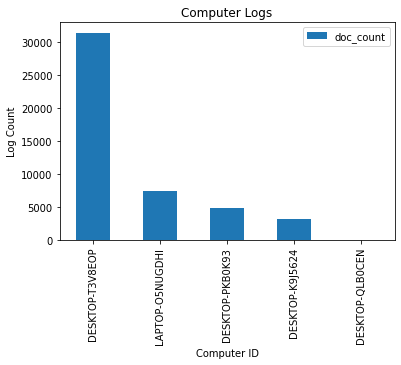

In [12]:
computer_pd = pd.DataFrame(result, columns=["key", "doc_count"])
#print(event_pd)
computer_pd.plot(x="key", y="doc_count", kind="bar");
plt.xlabel('Computer ID')
plt.ylabel('Log Count')
plt.title('Computer Logs')